In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.4.0'

In [4]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D,BatchNormalization

In [5]:
def AlexNet():
    model = Sequential()

    # 1st Convolutional Layer
    model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),strides=(4,4), padding='valid'))
    model.add(Activation('relu'))

    # Pooling 
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

    # Batch Normalisation before passing it to the next layer
    model.add(BatchNormalization())

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

    # Batch Normalisation
    model.add(BatchNormalization())

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # Batch Normalisation
    model.add(BatchNormalization())

    # 4th Convolutional Layer
    model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # Batch Normalisation
    model.add(BatchNormalization())

    # 5th Convolutional Layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
    model.add(Activation('relu'))

    # Pooling
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

    # Batch Normalisation
    model.add(BatchNormalization())

    # Passing it to a dense layer
    model.add(Flatten())

    # 1st Dense Layer
    model.add(Dense(4096, input_shape=(224*224*3,)))
    model.add(Activation('relu'))

    # Add Dropout to prevent overfitting
    model.add(Dropout(0.4))

    # Batch Normalisation
    model.add(BatchNormalization())

    # 2nd Dense Layer
    model.add(Dense(4096))
    model.add(Activation('relu'))

    # Add Dropout
    model.add(Dropout(0.4))

    # Batch Normalisation
    model.add(BatchNormalization())

    # 3rd Dense Layer
    model.add(Dense(1000))
    model.add(Activation('relu'))

    # Add Dropout
    model.add(Dropout(0.4))

    # Batch Normalisation
    model.add(BatchNormalization())

    # Output Layer
    model.add(Dense(10))
    model.add(Activation('softmax'))

#     model.summary()
    return model

In [6]:
import pandas as pd
import os,shutil,math,scipy,cv2
import numpy as np
import matplotlib.pyplot as plt
import random as rn


from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,roc_curve,auc

from PIL import Image
from PIL import Image as pil_image
from PIL import ImageDraw

from time import time
from glob import glob
from tqdm import tqdm
from skimage.io import imread
from IPython.display import SVG

# from scipy import misc,ndimage
# from scipy.ndimage.interpolation import zoom
# from scipy.ndimage import imread


from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler

In [7]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('acc')
    ax[1].plot(history.epoch, history.history["acc"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_acc"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [8]:
def label_assignment(img,label):
    return label

def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        
        X.append(np.array(img))
        Z.append(str(label))

In [9]:
chihuahua_dir = '../input/stanford-dogs-dataset/images/Images/n02085620-Chihuahua'
japanese_spaniel_dir = '../input/stanford-dogs-dataset/images/Images/n02085782-Japanese_spaniel'
maltese_dir = '../input/stanford-dogs-dataset/images/Images/n02085936-Maltese_dog'
pekinese_dir = '../input/stanford-dogs-dataset/images/Images/n02086079-Pekinese'
shitzu_dir = '../input/stanford-dogs-dataset/images/Images/n02086240-Shih-Tzu'
blenheim_spaniel_dir = '../input/stanford-dogs-dataset/images/Images/n02086646-Blenheim_spaniel'
papillon_dir = '../input/stanford-dogs-dataset/images/Images/n02086910-papillon'
toy_terrier_dir = '../input/stanford-dogs-dataset/images/Images/n02087046-toy_terrier'
afghan_hound_dir = '../input/stanford-dogs-dataset/images/Images/n02088094-Afghan_hound'
basset_dir = '../input/stanford-dogs-dataset/images/Images/n02088238-basset'


X = []
Z = []
imgsize = 227

In [10]:
training_data('chihuahua',chihuahua_dir)
training_data('japanese_spaniel',japanese_spaniel_dir)
training_data('maltese',maltese_dir)
training_data('pekinese',pekinese_dir)
training_data('shitzu',shitzu_dir)
training_data('blenheim_spaniel',blenheim_spaniel_dir)
training_data('papillon',papillon_dir)
training_data('toy_terrier',toy_terrier_dir)
training_data('afghan_hound',afghan_hound_dir)
training_data('basset',basset_dir)

100%|██████████| 175/175 [00:01<00:00, 88.70it/s]


In [11]:
label_encoder= LabelEncoder()
Y = label_encoder.fit_transform(Z)
Y = to_categorical(Y,10)
X = np.array(X)
X = X/255

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.5)

In [12]:
augs_gen = ImageDataGenerator() 

augs_gen.fit(x_train)

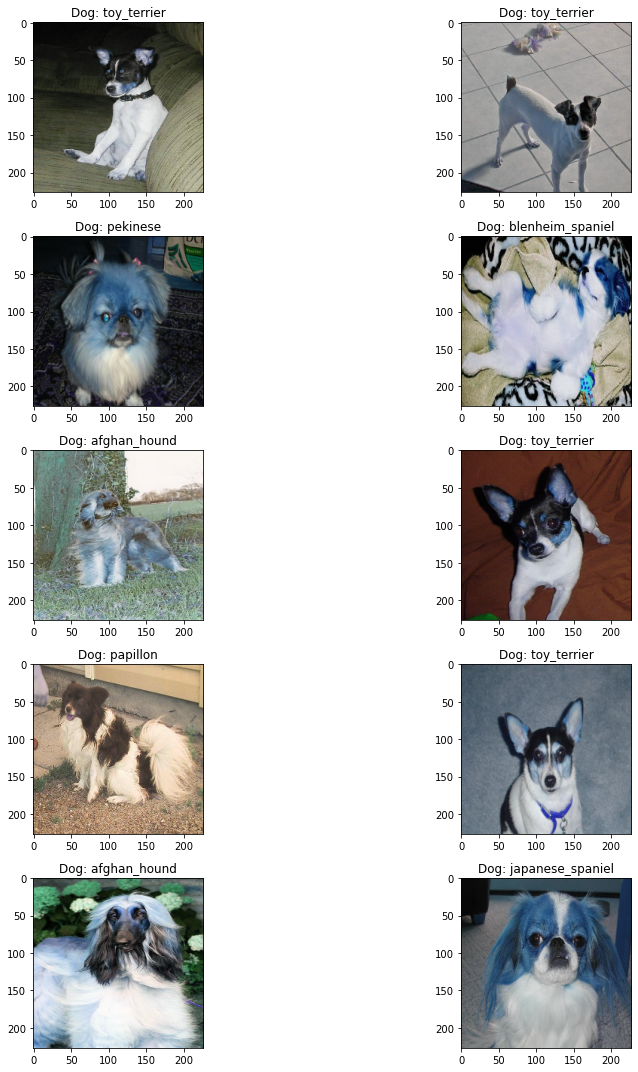

In [13]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Dog: '+Z[l])
        
plt.tight_layout()

In [14]:
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=1e-2)
# cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=prediction, labels=y))
model = AlexNet()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit_generator(augs_gen.flow(x_train,y_train,batch_size=16), validation_data  = (x_test,y_test),epochs = 50)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
61/61 [==============================] - 7s 54ms/step - loss: 3.5036 - accuracy: 0.1339 - val_loss: 2.4867 - val_accuracy: 0.1290
Epoch 2/50
61/61 [==============================] - 2s 28ms/step - loss: 2.8864 - accuracy: 0.1470 - val_loss: 2.5850 - val_accuracy: 0.1290
Epoch 3/50
61/61 [==============================] - 2s 28ms/step - loss: 2.5961 - accuracy: 0.1959 - val_loss: 2.4856 - val_accuracy: 0.1290
Epoch 4/50
61/61 [==============================] - 2s 27ms/step - loss: 2.5139 - accuracy: 0.1992 - val_loss: 2.3766 - val_accuracy: 0.1020
Epoch 5/50
61/61 [==============================] - 2s 27ms/step - loss: 2.5523 - accuracy: 0.1965 - val_loss: 2.5672 - val_accuracy: 0.0853
Epoch 6/50
61/61 [==============================] - 2s 29ms/step - loss: 2.5992 - accuracy: 0.1938 - val_loss: 2.4527 - val_accuracy: 0.0895
Epoch 7/50
61/61 [==============================] - 2s 37ms/step - loss: 2.3275 - accuracy: 0.2247 - val_loss: 2.4182 - val_accuracy: 0.1290
Epoch 8/50
61